## Data Analysis

### Research Questions
#### Based on the dataset's attributes, the following two research questions will be investigated:

#### a) Is it possible to predict the type of a wine by analyzing its chemical features?
#### b) Which chemical features are more strongly related to a wine’s type?
#### We will answer this questions after in this case of study.

### Import libraries and download dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Download CSV from link
url = 'https://storage.googleapis.com/the_public_bucket/wine-clustering.csv'
df = pd.read_csv(url)

# Show first rows of the dataset
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Cleaning data

In [6]:
# Count NaN values from columns
nan_counts = df.isna().sum()

# Show amount of NaN values from columns
print(nan_counts)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


#### We can see that the data has no Nan values, is no needed to apply statistics methods to supply those values.

In [7]:
# Descriptive statistics from columns
df.describe().round(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,12.362,1.602,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,13.678,3.082,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


### Research Questions
#### Based on the dataset's attributes, the following two research questions will be investigated:

#### a) Is it possible to predict the type of a wine by analyzing its chemical features?
#### b) Which chemical features are more strongly related to a wine’s type?

### Variable distributions

#### Taking a look at the distribution of the variables, we can identify outliers, insights and anomalies into the data.
#### In case of alcohol percentage, we can see that the total of wines falls between 11.5 and 14.5, most commonly 12.5. This is because that is the natural alcohol level produced by the fermentation process of grapes.

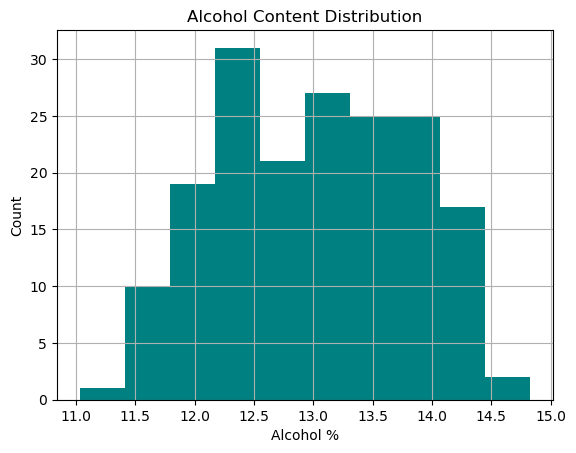

In [8]:
hist_quality = df['Alcohol']
plt.hist(hist_quality, 10, facecolor='teal')
plt.xlabel('Alcohol %')
plt.ylabel('Count')
plt.title('Alcohol Content Distribution')
plt.grid(True)
plt.show()

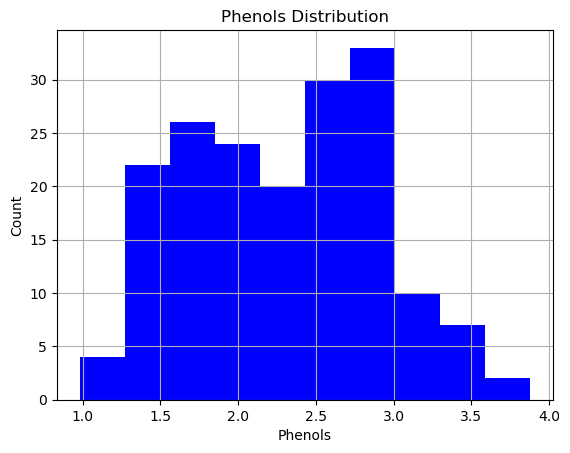

In [9]:
hist_fixed = df['Total_Phenols']
plt.hist(hist_fixed, 10, facecolor='blue')
plt.xlabel('Phenols')
plt.ylabel('Count')
plt.title('Phenols Distribution')
plt.grid(True)
plt.show()

#### We can see that the range of Phenols in wine falls between 1.5 and 3.5. This is because a grape varieties used to make the wines.

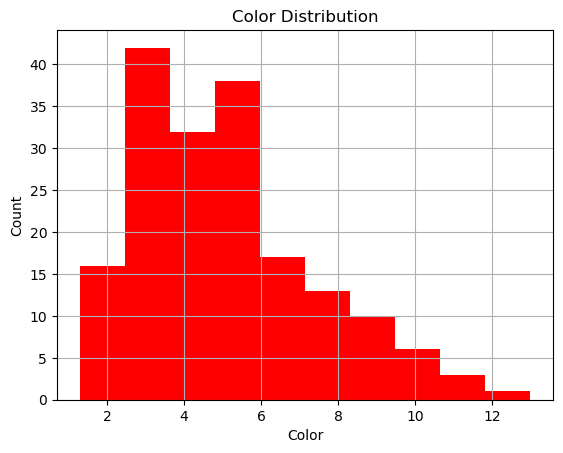

In [10]:
hist_volatile = df['Color_Intensity']
plt.hist(hist_volatile, 10, facecolor='red')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Color Intensity Distribution')
plt.grid(True)
plt.show()

#### In case of Color Intensity we can say in advance that these are three types of wine of the same hue, because the distribution is mostly clustered around close values.

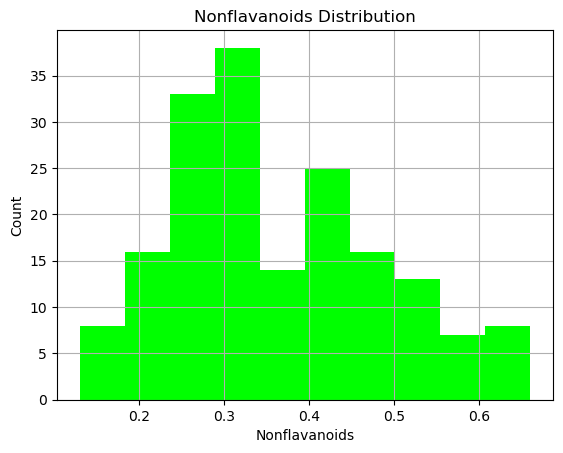

In [11]:
hist_citric = df['Nonflavanoid_Phenols']
plt.hist(hist_citric, 10, facecolor='lime')
plt.xlabel('Nonflavanoids')
plt.ylabel('Count')
plt.title('Nonflavanoids Distribution')
plt.grid(True)
plt.show()

#### The nonflavonoids are phenolic compounds present in wine, but their presence and concentration can depend on factors such as maceration time, fermentation, and aging in barrels, among others. We can see the most frecuently values falls between 2.5 and 3, followed by 4.

### Features correlation

C:\Users\usuario\AppData\Local\Temp\ipykernel_9264\1156963336.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlations.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Features Heatmap')

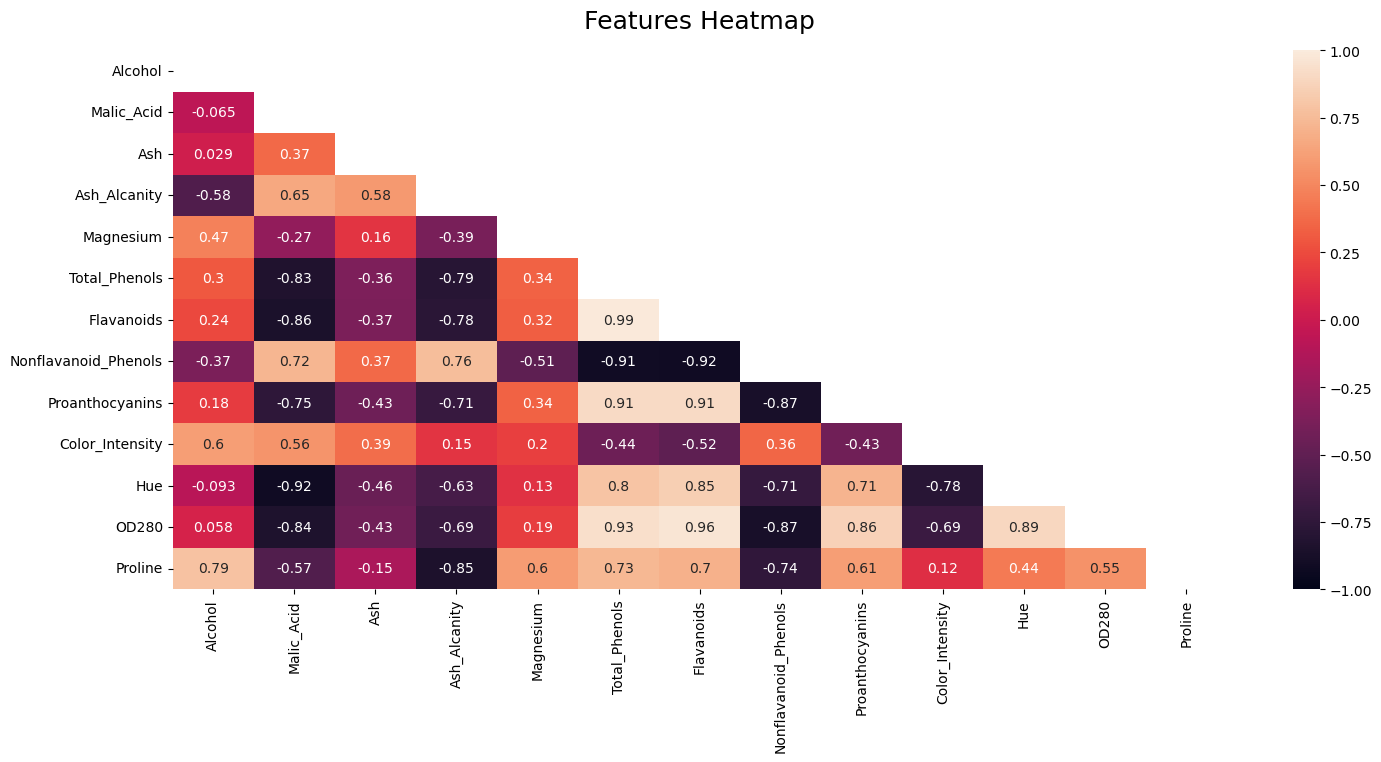

In [14]:

correlations = df.select_dtypes(include = ["number"]).corr()
plt.figure(figsize=(17, 7))
mask = np.triu(np.ones_like(correlations.corr(), dtype=np.bool))
heatmap = sns.heatmap(correlations.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Heatmap', fontdict={'fontsize':18}, pad=16)

#### In this visual, we can see the correlation index between the variables, i.e., a strong correlation between Flavonoids and Total Phenols, because Flavonoids are the largest group of naturally occurring phenolic compounds, which occurs in different plant parts both in free state and as glycosides.